### CSE-221710315024-LIKHITA YANAMADDI

### UNKNOWN DATASET DRIVE LINK: 
https://drive.google.com/drive/folders/1eTvCwBkJBmChWjsPfvbg8kfkSqTo-iyL?usp=sharing

In [ ]:
!pip install soundfile

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import soundfile
import numpy as np
import librosa
# librosa is a Python library for analyzing audio and music.
# It has a flatter package layout, standardizes interfaces and names,
# backwards compatibility, modular functions, and readable code.
import glob
import os
from sklearn.model_selection import train_test_split

#define a dictionary to hold numbers and the emotions available in the 
#RAVDESS dataset, and a list to hold those we want- angry,sad, neutral, happy.


#this is the Ryerson Audio-Visual Database of Emotional Speech and Song dataset,
#This dataset has 7356 files rated by 247 individuals 10 times on emotional 
# validity, intensity, and genuineness. The entire dataset is 24.8GB from
# 24 actors, but we’ve lowered the sample rate on all the files.

# all emotions on RAVDESS dataset
int2emotion = {
    "01": "neutral",
    "02": "calm",
    "03": "happy",
    "04": "sad",
    "05": "angry",
    "06": "fearful",
    "07": "disgust",
    "08": "surprised"
}

# we allow only these emotions
AVAILABLE_EMOTIONS = {
    "angry",
    "sad",
    "neutral",
    "happy"
}

In [ ]:
def extract_feature(file_name, **kwargs):
    """
    Extract feature from audio file `file_name`
        Features supported:
            - MFCC (mfcc)
            - Chroma (chroma)
            - MEL Spectrogram Frequency (mel)
            - Contrast (contrast)
            - Tonnetz (tonnetz)
        e.g:
        `features = extract_feature(path, mel=True, mfcc=True)`
    """
    mfcc = kwargs.get("mfcc")
    chroma = kwargs.get("chroma")
    mel = kwargs.get("mel")
    contrast = kwargs.get("contrast")
    tonnetz = kwargs.get("tonnetz")
    with soundfile.SoundFile(file_name) as sound_file:
        X = sound_file.read(dtype="float32")
        sample_rate = sound_file.samplerate
        if chroma or contrast:
            stft = np.abs(librosa.stft(X))
        result = np.array([])
        if mfcc:
            mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis=0)
            result = np.hstack((result, mfccs))
        if chroma:
            chroma = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
            result = np.hstack((result, chroma))
        if mel:
            mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
            result = np.hstack((result, mel))
        if contrast:
            contrast = np.mean(librosa.feature.spectral_contrast(S=stft, sr=sample_rate).T,axis=0)
            result = np.hstack((result, contrast))
        if tonnetz:
            tonnetz = np.mean(librosa.feature.tonnetz(y=librosa.effects.harmonic(X), sr=sample_rate).T,axis=0)
            result = np.hstack((result, tonnetz))
    return result

In [ ]:
def load_data(test_size=0.2):
    X, y = [], []
    try :
      for file in glob.glob("/content/drive/My Drive/Colab Notebooks/data set/AudioData"):
          # get the base name of the audio file
          basename = os.path.basename(file)
          print(basename)
          # get the emotion label
          emotion = int2emotion[basename.split("-")[2]]
          # we allow only AVAILABLE_EMOTIONS we set
          if emotion not in AVAILABLE_EMOTIONS:
              continue
          # extract speech features
          features = extract_feature(file, mfcc=True, chroma=True, mel=True)
          # add to data
          X.append(features)
          l={'happy':0.0,'sad':1.0,'neutral':3.0,'angry':4.0}
          y.append(l[emotion])
    except :
         pass
    # split the data to training and testing and return it
    return train_test_split(np.array(X), y, test_size=test_size, random_state=7)

In [ ]:
sample_file = '/content/drive/My Drive/Colab Notebooks/data set/AudioData/DC/a01.wav'

In [ ]:
# Load the audio data with librosa from .wav file
# input path 
data, sampling_rate = librosa.load(sample_file)
# output is data teh discrete values, sampling rate

In [ ]:
## Audio sampled data ouput shape
data.shape


(80434,)

In [ ]:
# sampling rate
sampling_rate

22050

In [ ]:
X, sample_rate = librosa.load(sample_file, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)
X.shape

(110250,)

In [ ]:
10*22050*2

441000

In [ ]:
X[:-100]

array([0.08215332, 0.0809021 , 0.07754517, ..., 0.21911621, 0.19934082,
       0.17391968], dtype=float32)

In [ ]:
librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)

array([[-318.34907634, -289.72019185, -269.75849637, ..., -219.42767604,
        -209.46609287, -180.1187328 ],
       [  83.44985313,  135.30527971,  182.35460902, ...,  229.88559252,
         238.01667462,  248.71813002],
       [ -54.12408135,   -7.18993656,   16.98681678, ...,   -4.90131715,
          -0.33663499,   -1.15097019],
       ...,
       [ -11.183432  ,  -10.80955344,   -9.52499654, ...,  -32.88296871,
         -32.24869379,  -24.09375983],
       [ -10.36455051,  -15.87282497,  -20.11362012, ...,  -16.86774535,
         -12.20967621,  -13.46425284],
       [  -0.92029628,   -8.4874924 ,  -13.82025247, ...,    4.01767426,
           8.50465788,   10.81932434]])

In [ ]:
librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13).shape

(13, 216)

In [ ]:
np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13),axis=0).shape

(216,)

In [ ]:
base_path = '/content/drive/My Drive/Colab Notebooks/data set/AudioData'
folders = [fol  for fol in os.listdir(base_path) if os.path.isdir(base_path+'/'+fol)]
folders

['JK', 'KL', 'JE', 'DC']

In [ ]:
df = pd.DataFrame(columns=['feature']) # empty dataframe with a single column feature
bookmark=0 # Row count
for cls,per in enumerate(folders): # Folder name with label
  # labels are from 0 to 3
  print(cls,per)

  for name in os.listdir(base_path+'/'+per):
        X, sample_rate = librosa.load(base_path+'/'+per+'/'+name, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)
        # shape of x is sr*duration
        sample_rate = np.array(sample_rate)
        mfccs = np.mean(librosa.feature.mfcc(y=X, 
                                            sr=sample_rate, 
                                            n_mfcc=13),
                        axis=0)
        # 216 values
        feature = mfccs
        # Appending class label to numpy array
        feature = np.append(feature,cls)
        # In each row we have a single column
        # In that column I have a numpy array as value
        df.loc[bookmark] = [feature]
        bookmark=bookmark+1

0 JK
1 KL
2 JE
3 DC


In [ ]:
# Top 5 rows
df.head()

,feature
0,"[-14.260570089536198, -9.794443423477855, -7.3..."
1,"[-23.24786881445334, -21.8824322667551, -22.46..."
2,"[-24.4791672217428, -23.70163006309942, -23.76..."
3,"[-27.43689401546252, -25.614000968041886, -23...."
4,"[4.857962390413935, 2.180288304326841, -2.7702..."


In [ ]:
df['feature'][0].shape

(217,)

In [ ]:
df['feature'][0][-1]

0.0

In [ ]:
df.shape

(479, 1)

In [ ]:
df.iloc[0][0].shape

(217,)

In [ ]:
df2 = pd.DataFrame(df['feature'].values.tolist())
df2.sample()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216
1,-23.247869,-21.882432,-22.464536,-21.925376,-21.525039,-21.747856,-22.579142,-22.473597,-13.029367,-3.608036,0.504552,-0.123957,-2.019746,-3.087927,-4.519319,-5.866865,-7.123424,-7.768707,-8.157277,-9.714922,-11.462122,-11.60833,-11.711986,-13.501631,-12.292124,-11.348449,-11.12915,-10.081434,-10.133344,-11.34308,-11.081588,-10.84629,-10.586519,-9.26417,-9.075927,-8.471176,-7.842408,-6.658286,-5.380388,-3.658577,...,-12.488512,-12.627724,-12.913944,-15.011854,-18.860261,-21.238805,-22.137217,-23.915206,-27.00336,-24.358719,-14.958878,-10.066057,-6.843982,-4.492913,-3.191575,-2.834656,-2.298204,-3.023312,-3.524936,-3.866469,-4.236668,-6.075979,-6.462602,-6.490086,-5.523988,-6.808219,-11.169137,-17.340306,-20.582039,-22.259705,-23.84677,-23.867451,-25.314444,-24.120343,-25.423557,-25.774556,-22.357973,-22.273973,-24.853915,0.0


In [ ]:
df2.isnull().sum(axis=1)

0       0
1       0
2      42
3       0
4       0
       ..
474     0
475     0
476     0
477     0
478     0
Length: 479, dtype: int64

In [ ]:
df2.isnull().sum()

0        0
1        0
2        0
3        0
4        0
      ... 
212    100
213    101
214    101
215    102
216    103
Length: 217, dtype: int64

In [ ]:
df2 = df2.dropna()

In [ ]:
df2[216].value_counts().sum()

376

In [ ]:
df2[216].isnull().sum()

0

In [ ]:
df2.shape

(376, 217)

In [ ]:
new_df = df2.rename(columns={216: "label"})
new_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,label
0,-14.260570,-9.794443,-7.310346,-7.640629,-8.021557,-7.615273,-7.358042,-6.709244,-6.135356,-5.676173,-5.211756,-5.024892,-4.131107,-2.656021,-3.130630,-3.866640,-5.847810,-8.843728,-8.957204,-8.453608,-8.555447,-9.160208,-8.053834,-5.311407,-4.671359,-5.452521,-5.768856,-8.011673,-6.291604,-5.106327,-6.533547,-8.885064,-10.042996,-9.022891,-8.517752,-7.578184,-6.954819,-8.240691,-9.762851,-8.814780,...,-7.060320,-5.065291,-4.523791,-3.231164,-2.773706,-2.120986,-2.896464,-2.772844,-1.174609,-0.549480,-0.086967,-0.454265,-2.171774,-4.466500,-8.574751,-12.943460,-17.648609,-19.347770,-18.138855,-8.223878,-4.072290,-3.252632,-3.292147,-5.184165,-6.215199,-8.214097,-9.955403,-12.292212,-13.567167,-13.965576,-10.343874,-7.896760,-7.816537,-8.215529,-7.872012,-6.891598,-4.735453,-2.250857,-1.219765,0.0
1,-23.247869,-21.882432,-22.464536,-21.925376,-21.525039,-21.747856,-22.579142,-22.473597,-13.029367,-3.608036,0.504552,-0.123957,-2.019746,-3.087927,-4.519319,-5.866865,-7.123424,-7.768707,-8.157277,-9.714922,-11.462122,-11.608330,-11.711986,-13.501631,-12.292124,-11.348449,-11.129150,-10.081434,-10.133344,-11.343080,-11.081588,-10.846290,-10.586519,-9.264170,-9.075927,-8.471176,-7.842408,-6.658286,-5.380388,-3.658577,...,-12.488512,-12.627724,-12.913944,-15.011854,-18.860261,-21.238805,-22.137217,-23.915206,-27.003360,-24.358719,-14.958878,-10.066057,-6.843982,-4.492913,-3.191575,-2.834656,-2.298204,-3.023312,-3.524936,-3.866469,-4.236668,-6.075979,-6.462602,-6.490086,-5.523988,-6.808219,-11.169137,-17.340306,-20.582039,-22.259705,-23.846770,-23.867451,-25.314444,-24.120343,-25.423557,-25.774556,-22.357973,-22.273973,-24.853915,0.0
3,-27.436894,-25.614001,-23.802954,-15.158523,-7.539637,-5.253020,-7.366501,-10.512463,-11.118834,-11.412631,-9.970023,-10.252454,-12.546367,-13.184998,-15.875084,-15.831312,-14.464615,-12.804901,-12.472990,-10.008247,-8.355015,-3.271981,0.738162,-0.352527,-4.148326,-1.231770,1.597498,1.129153,-2.638529,-4.126524,-6.357771,-10.682904,-18.283030,-18.860882,-19.660488,-19.750202,-12.065006,-10.242125,-10.448796,-9.667010,...,-12.622553,-15.717974,-14.625128,-15.672617,-11.482865,-7.371888,-5.312112,-3.513985,-1.382509,-1.048110,-0.880102,-0.452932,-0.770737,-0.933147,-0.851610,-1.308815,-1.053886,-1.169214,-2.275628,-3.297978,-3.418816,-3.589221,-5.598546,-8.025823,-8.724397,-8.178847,-9.144625,-10.964461,-15.137102,-14.389808,-14.321583,-15.970696,-18.551996,-21.979510,-25.047777,-24.292181,-24.340515,-26.337542,-26.042201,0.0
4,4.857962,2.180288,-2.770249,-1.995826,-0.780680,-0.125302,-0.136835,-2.471162,-7.706022,-13.459490,-14.040008,-16.834766,-20.775208,-23.800922,-24.787725,-24.586521,-23.979071,-22.536275,-16.053445,-10.373548,-8.427776,-9.595952,-12.576156,-13.205725,-14.051876,-14.634588,-14.710397,-12.013880,-7.229247,-5.630402,-7.033965,-7.817953,-8.705202,-8.718037,-9.055076,-11.202615,-11.673589,-12.009576,-15.914419,-18.248776,...,-9.552037,-6.634409,-6.136538,-6.048594,-4.214014,-3.243250,-5.907762,-9.141914,-10.232233,-8.783634,-5.757603,-4.473499,-3.499962,-4.337528,-4.677007,-5.521075,-3.069710,-4.638232,-5.834335,-4.799331,-5.610016,-7.142639,-7.649345,-10.227697,-12.666223,-19.119767,-21.233922,-21.995479,-23.698103,-27.778395,-27.038454,-26.411519,-25.299244,-25.261126,-24.063918,-24.168632,-23.207541,-23.683942,-23.100682,0.0
5,11.171939,6.345472,-14.378912,-15.434625,-13.171749,-12.466776,-9.944689,-6.855007,-5.904826,-4.828486,-5.179103,-4.763272,-4.625385,-5.232233,-6.035913,-5.835548,-5.503596,-3.380965,-3.071690,-1.521376,-2.162901,-4.140971,-5.555904,-6.060420,-4.722681,-4.290475,-3.439849,-1.189634,-1.050191,-2.886996,-6.491181,-11.630248,-14.716508,-15.363808,-17.000927,-17.584142,-17.160508,-18.008622,

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(new_df.drop('label',axis=1),\
                                                 new_df['label'],random_state=5)
print(X_train.shape)

(282, 216)


In [ ]:
y_train.value_counts(normalize=True)

2.0    0.294326
0.0    0.276596
3.0    0.234043
1.0    0.195035
Name: label, dtype: float64

In [ ]:
y_test.value_counts(normalize=True)

3.0    0.308511
0.0    0.276596
2.0    0.265957
1.0    0.148936
Name: label, dtype: float64

## randomforest classifier training accuracy-1.00 testing accuracy-0.56

In [ ]:
y_train

159    1.0
476    3.0
141    1.0
139    1.0
432    3.0
      ... 
86     0.0
144    1.0
257    2.0
276    2.0
452    3.0
Name: label, Length: 282, dtype: float64

In [ ]:
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

In [ ]:
y_train_cat

array([[0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]], dtype=float32)

In [ ]:
y_train[:5]

159    1.0
476    3.0
141    1.0
139    1.0
432    3.0
Name: label, dtype: float64

In [ ]:
## Bulding the model
model_ann = Sequential()
model_ann.add(Dense(512,input_shape=(216,),activation='relu'))
model_ann.add(Dense(64,activation='relu'))
model_ann.add(Dense(4,activation='softmax'))
model_ann.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 512)               111104    
_________________________________________________________________
dense_3 (Dense)              (None, 64)                32832     
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 260       
Total params: 144,196
Trainable params: 144,196
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compiling the model
model_ann.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
## Train the model
model_ann.fit(X_train,y_train_cat,epochs=20,validation_data=(X_test,y_test_cat))

Train on 282 samples, validate on 94 samples
Epoch 1/20
282/282 [==============================] - 0s 1ms/step - loss: 12.0526 - accuracy: 0.3475 - val_loss: 6.0486 - val_accuracy: 0.3404
Epoch 2/20
282/282 [==============================] - 0s 153us/step - loss: 3.8498 - accuracy: 0.3723 - val_loss: 3.1464 - val_accuracy: 0.3830
Epoch 3/20
282/282 [==============================] - 0s 146us/step - loss: 2.0332 - accuracy: 0.4787 - val_loss: 1.9883 - val_accuracy: 0.4468
Epoch 4/20
282/282 [==============================] - 0s 151us/step - loss: 1.4096 - accuracy: 0.5426 - val_loss: 1.7876 - val_accuracy: 0.4681
Epoch 5/20
282/282 [==============================] - 0s 149us/step - loss: 0.9455 - accuracy: 0.6277 - val_loss: 1.4552 - val_accuracy: 0.5319
Epoch 6/20
282/282 [==============================] - 0s 158us/step - loss: 0.7182 - accuracy: 0.7163 - val_loss: 1.5099 - val_accuracy: 0.5106
Epoch 7/20
282/282 [==============================] - 0s 156us/step - loss: 0.7019 - accurac

In [ ]:
X_train.shape

(282, 216)

In [ ]:
x_traincnn =np.expand_dims(X_train, axis=2)
x_testcnn= np.expand_dims(X_test, axis=2)

In [ ]:
x_traincnn.shape

(282, 216, 1)

In [ ]:
#X_train, X_test, y_train, y_test = load_data(test_size=0.25)

print("[+] Number of training samples:", X_train.shape[0])
# number of samples in testing data
print("[+] Number of testing samples:", X_test.shape[0])

[+] Number of training samples: 282
[+] Number of testing samples: 94


In [ ]:
import numpy as np
X_train = np.asarray(X_train)
y_train= np.asarray(y_train)
X_test=np.array(X_test)
y_test=np.array(y_test)

In [ ]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((282, 216), (282,), (94, 216), (94,))

In [ ]:
x_traincnn = np.expand_dims(X_train, axis=2)
x_testcnn = np.expand_dims(X_test, axis=2)

In [ ]:
x_traincnn.shape,x_testcnn.shape

((282, 216, 1), (94, 216, 1))

In [ ]:
## Bulid the model
model = Sequential()

model.add(Conv1D(256, 5,padding='same',
                 input_shape=(216,1)))
model.add(Activation('relu'))
model.add(Conv1D(128, 5,padding='same'))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))
#model.add(Conv1D(128, 5,padding='same',))
#model.add(Activation('relu'))
#model.add(Conv1D(128, 5,padding='same',))
#model.add(Activation('relu'))
#model.add(Dropout(0.2))
model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(4,activation='softmax'))
opt = keras.optimizers.rmsprop(lr=0.00001, decay=1e-6)

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_3 (Conv1D)            (None, 216, 256)          1536      
_________________________________________________________________
activation_2 (Activation)    (None, 216, 256)          0         
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 216, 128)          163968    
_________________________________________________________________
activation_3 (Activation)    (None, 216, 128)          0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 216, 128)          0         
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 27, 128)           0         
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 27, 128)          

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])

In [ ]:
cnnhistory=model.fit(x_traincnn, y_train_cat, batch_size=16, epochs=100, validation_data=(x_testcnn, y_test_cat))

Train on 282 samples, validate on 94 samples
Epoch 1/100
282/282 [==============================] - 2s 8ms/step - loss: 1.6810 - accuracy: 0.2943 - val_loss: 1.4228 - val_accuracy: 0.3085
Epoch 2/100
282/282 [==============================] - 2s 7ms/step - loss: 1.3779 - accuracy: 0.3227 - val_loss: 1.3297 - val_accuracy: 0.3830
Epoch 3/100
282/282 [==============================] - 2s 7ms/step - loss: 1.2953 - accuracy: 0.4255 - val_loss: 1.2956 - val_accuracy: 0.4149
Epoch 4/100
282/282 [==============================] - 2s 7ms/step - loss: 1.2642 - accuracy: 0.4610 - val_loss: 1.2799 - val_accuracy: 0.4149
Epoch 5/100
282/282 [==============================] - 2s 7ms/step - loss: 1.2384 - accuracy: 0.4610 - val_loss: 1.2604 - val_accuracy: 0.4468
Epoch 6/100
282/282 [==============================] - 2s 7ms/step - loss: 1.2176 - accuracy: 0.4858 - val_loss: 1.2541 - val_accuracy: 0.4255
Epoch 7/100
282/282 [==============================] - 2s 7ms/step - loss: 1.2001 - accuracy: 0.4

In [ ]:
print(cnnhistory.history['accuracy'][-1])


0.8439716


In [ ]:
score, acc = model.evaluate(x_traincnn, y_train_cat)
score, acc = model.evaluate(x_testcnn, y_test_cat)
print('Train score:', score)
print('Train accuracy:', acc)
print('Test score:', score)
print('Test accuracy:', acc)

94/94 [==============================] - 0s 1ms/step
Train score: 0.747173973854552
Train accuracy: 0.6808510422706604
Test score: 0.747173973854552
Test accuracy: 0.6808510422706604


In [ ]:
cnn_accuracy=0.765


In [ ]:
#ml algorithms
from sklearn.svm import SVC 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [ ]:
"""DECISION TREE """

dtree_model = DecisionTreeClassifier(max_depth = 6).fit(X_train, y_train) 
dtree_predictions = dtree_model.predict(X_test) 

print(accuracy_score(y_true=y_test,y_pred=dtree_predictions))
dtAccuracy=accuracy_score(y_true=y_test,y_pred=dtree_predictions)


print(classification_report(y_test,dtree_predictions)) 
# creating a confusion matrix 
print(confusion_matrix(y_test, dtree_predictions) )

0.5319148936170213
              precision    recall  f1-score   support

         0.0       0.50      0.46      0.48        26
         1.0       1.00      0.93      0.96        14
         2.0       0.42      0.52      0.46        25
         3.0       0.46      0.41      0.44        29

    accuracy                           0.53        94
   macro avg       0.60      0.58      0.59        94
weighted avg       0.54      0.53      0.53        94

[[12  0  8  6]
 [ 0 13  0  1]
 [ 5  0 13  7]
 [ 7  0 10 12]]


In [ ]:
"""SUPPORT VECTOR MACHINE"""
"""train accuracy"""

svm_model_linear = SVC(kernel = 'linear', C = 1).fit(X_train, y_train) 
svm_predictions = svm_model_linear.predict(X_train) 


print(accuracy_score(y_true=y_train,y_pred=svm_predictions))
svmAccuracy=accuracy_score(y_true=y_train,y_pred=svm_predictions)
print(classification_report(y_train,svm_predictions)) 
# creating a confusion matrix 
print(confusion_matrix(y_train, svm_predictions) )

1.0
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        78
         1.0       1.00      1.00      1.00        55
         2.0       1.00      1.00      1.00        83
         3.0       1.00      1.00      1.00        66

    accuracy                           1.00       282
   macro avg       1.00      1.00      1.00       282
weighted avg       1.00      1.00      1.00       282

[[78  0  0  0]
 [ 0 55  0  0]
 [ 0  0 83  0]
 [ 0  0  0 66]]


In [ ]:
"""SUPPORT VECTOR MACHINE"""
"""test accuracy"""

svm_model_linear = SVC(kernel = 'linear', C = 1).fit(X_train, y_train) 
svm_predictions = svm_model_linear.predict(X_test) 


print(accuracy_score(y_true=y_test,y_pred=svm_predictions))
svmAccuracy=accuracy_score(y_true=y_test,y_pred=svm_predictions)
print(classification_report(y_test,svm_predictions)) 
# creating a confusion matrix 
print(confusion_matrix(y_test, svm_predictions) )

0.48936170212765956
              precision    recall  f1-score   support

         0.0       0.29      0.42      0.34        26
         1.0       1.00      1.00      1.00        14
         2.0       0.48      0.48      0.48        25
         3.0       0.53      0.31      0.39        29

    accuracy                           0.49        94
   macro avg       0.57      0.55      0.55        94
weighted avg       0.52      0.49      0.49        94

[[11  0  8  7]
 [ 0 14  0  0]
 [12  0 12  1]
 [15  0  5  9]]


In [ ]:
"""Random Forest"""
 
 
classifier = RandomForestClassifier(n_estimators = 50, random_state = 0) 
  
# fit the regressor with x and y data 
classifier.fit(X_train, y_train)   

c_p = classifier.predict(X_train) 


print(accuracy_score(y_true=y_train,y_pred=c_p))
rfAccuracy=accuracy_score(y_true=y_train,y_pred=c_p)
print(classification_report(y_train,c_p)) 
# creating a confusion matrix 
print(confusion_matrix(y_train,c_p) )

1.0
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        78
         1.0       1.00      1.00      1.00        55
         2.0       1.00      1.00      1.00        83
         3.0       1.00      1.00      1.00        66

    accuracy                           1.00       282
   macro avg       1.00      1.00      1.00       282
weighted avg       1.00      1.00      1.00       282

[[78  0  0  0]
 [ 0 55  0  0]
 [ 0  0 83  0]
 [ 0  0  0 66]]


In [ ]:
"""Random Forest"""
 
 
classifier = RandomForestClassifier(n_estimators = 50, random_state = 0) 
  
# fit the regressor with x and y data 
classifier.fit(X_train, y_train)   

c_p = classifier.predict(X_test) 


print(accuracy_score(y_true=y_test,y_pred=c_p))
rfAccuracy=accuracy_score(y_true=y_test,y_pred=c_p)
print(classification_report(y_test,c_p)) 
# creating a confusion matrix 
print(confusion_matrix(y_test,c_p) )


0.6702127659574468
              precision    recall  f1-score   support

         0.0       0.59      0.62      0.60        26
         1.0       0.93      1.00      0.97        14
         2.0       0.63      0.68      0.65        25
         3.0       0.64      0.55      0.59        29

    accuracy                           0.67        94
   macro avg       0.70      0.71      0.70        94
weighted avg       0.67      0.67      0.67        94

[[16  0  5  5]
 [ 0 14  0  0]
 [ 3  1 17  4]
 [ 8  0  5 16]]


mlp classifier

In [ ]:
model_params = {
    'alpha': 0.01,
    'batch_size': 256,
    'epsilon': 1e-08, 
    'hidden_layer_sizes': (300,), 
    'learning_rate': 'adaptive', 
    'max_iter': 500, 
}

In [ ]:
# initialize Multi Layer Perceptron classifier
# with best parameters ( so far )
from sklearn.neural_network import MLPClassifier
modelmlp = MLPClassifier(**model_params)

In [ ]:
# train the model
print("[*] Training the model...")
modelmlp.fit(X_train, y_train)

# predict 75% of data to measure how good we are
y_pred = modelmlp.predict(X_train)

# calculate the accuracy
mlpAccuracy = accuracy_score(y_true=y_train, y_pred=y_pred)

print("Accuracy: {:.2f}%".format(mlpAccuracy*100))

[*] Training the model...
Accuracy: 100.00%


In [ ]:
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix 
print(classification_report(y_train,y_pred))
print(confusion_matrix(y_train,y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        78
         1.0       1.00      1.00      1.00        55
         2.0       1.00      1.00      1.00        83
         3.0       1.00      1.00      1.00        66

    accuracy                           1.00       282
   macro avg       1.00      1.00      1.00       282
weighted avg       1.00      1.00      1.00       282

[[78  0  0  0]
 [ 0 55  0  0]
 [ 0  0 83  0]
 [ 0  0  0 66]]


In [ ]:
# train the model
print("[*] Training the model...")
modelmlp.fit(X_train, y_train)

# predict 25% of data to measure how good we are
y_pred = modelmlp.predict(X_test)

# calculate the accuracy
mlpAccuracy = accuracy_score(y_true=y_test, y_pred=y_pred)

print("Accuracy: {:.2f}%".format(mlpAccuracy*100))

[*] Training the model...
Accuracy: 50.00%


In [ ]:
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix 
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.32      0.46      0.37        26
         1.0       0.78      1.00      0.88        14
         2.0       0.59      0.52      0.55        25
         3.0       0.50      0.28      0.36        29

    accuracy                           0.50        94
   macro avg       0.55      0.56      0.54        94
weighted avg       0.51      0.50      0.49        94

[[12  0  7  7]
 [ 0 14  0  0]
 [11  0 13  1]
 [15  4  2  8]]


In [ ]:
accuracy=[dtAccuracy*100,cnn_accuracy*100,mlpAccuracy*100,rfAccuracy*100,svmAccuracy*100]
algos=["DecisionTree","CNN","MLP","RandomForest","SVM"]

In [ ]:
import matplotlib.pyplot as plt

<BarContainer object of 5 artists>

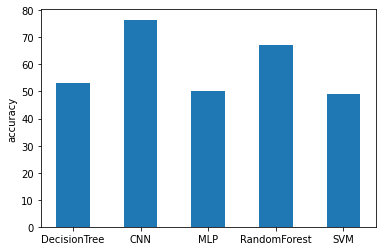

In [ ]:
plt.ylabel("accuracy")
plt.bar(algos,accuracy,0.5)